# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

<b>Одним из условия выполнения работы является использование алгоритма линейной регрессии. </b>

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

<i>
Процесс, конечно, гораздо сложнее. Если бурить скважины только в самые лучшие зоны может серьезно испортиться экономика проекта, сократиться срок его жизни и общая выработка запасов. Как следствие - повышение краткосрочной выгоды и долгосрочные убытки. Для государства - серьезное сокращение налоговых сборов и ресурсной базы.

Проект является учебным, поэтому все данные синтетическими: детали контрактов и характеристики месторождений не разглашаются. 

    

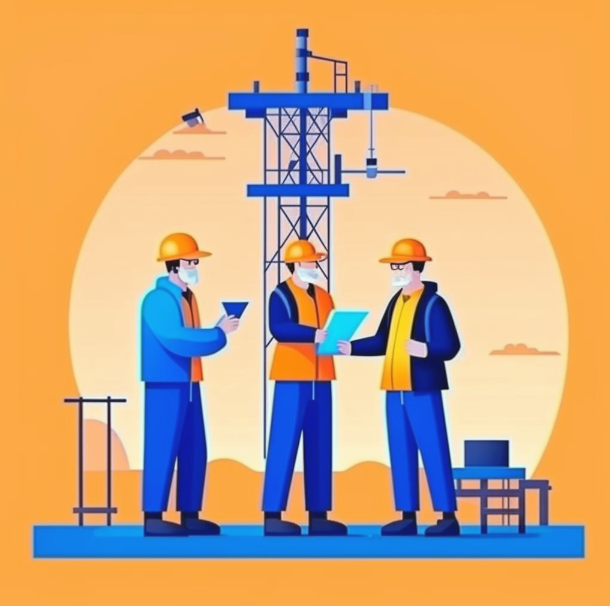

<h1>Навигация<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Подытог" data-toc-modified-id="Подытог-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подытог</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Подытог" data-toc-modified-id="Подытог-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подытог</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Подытог" data-toc-modified-id="Подытог-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подытог</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Функция-расчета-прибыли" data-toc-modified-id="Функция-расчета-прибыли-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Функция расчета прибыли</a></span></li><li><span><a href="#Расчет-риска-и-прибыли-для-каждого-региона" data-toc-modified-id="Расчет-риска-и-прибыли-для-каждого-региона-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Расчет риска и прибыли для каждого региона</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Загрузка и подготовка данных

In [2]:
import pandas as pd
import math
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV #попробуем автоподбор параметров
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, make_scorer

from sklearn.metrics import mean_squared_error
pd.options.mode.chained_assignment = None

Описание данных

    Данные геологоразведки трёх регионов находятся в файлах: [ geo_data_0.csv; geo_data_1.csv; geo_data_2.csv ]
- id — уникальный идентификатор скважины;  
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);  
- product — объём запасов в скважине (тыс. баррелей).  

In [3]:
pd.set_option("display.precision", 7)

try:
    df0 = pd.read_csv('C://datasets/geo_data_0.csv')
    df1 = pd.read_csv('C://datasets/geo_data_1.csv')
    df2 = pd.read_csv('C://datasets/geo_data_2.csv')

except:
    df0 = pd.read_csv('/datasets/geo_data_0.csv')
    df1 = pd.read_csv('/datasets/geo_data_1.csv')
    df2 = pd.read_csv('/datasets/geo_data_2.csv')

display(df0.info())
display(df1.info())
display(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [4]:
display(df0.head())
display(df1.head())
display(df2.head())

,id,f0,f1,f2,product
0,txEyH,0.7057450,-0.4978225,1.2211699,105.2800618
1,2acmU,1.3347113,-0.3401643,4.3650803,73.0377503
2,409Wp,1.0227323,0.1519904,1.4199262,85.2656471
3,iJLyR,-0.0321716,0.1390327,2.9785660,168.6207756
4,Xdl7t,1.9884311,0.1554127,4.7517691,154.0366467


,id,f0,f1,f2,product
0,kBEdx,-15.0013482,-8.2759999,-0.0058760,3.1791026
1,62mP7,14.2720878,-3.4750832,0.9991827,26.9532610
2,vyE1P,6.2631874,-5.9483858,5.0011602,134.7663052
3,KcrkZ,-13.0811963,-11.5060569,4.9994149,137.9454077
4,AHL4O,12.7021949,-8.1474334,5.0043626,134.7663052


,id,f0,f1,f2,product
0,fwXo0,-1.1469871,0.9633279,-0.8289649,27.7586732
1,WJtFt,0.2627779,0.2698390,-2.5301865,56.0696966
2,ovLUW,0.1945873,0.2890350,-5.5864328,62.8719100
3,q6cA6,2.2360596,-0.5537599,0.9300376,114.5728417
4,WPMUX,-0.5159929,1.7162656,5.8990115,149.6007459


Распределения данных в df0


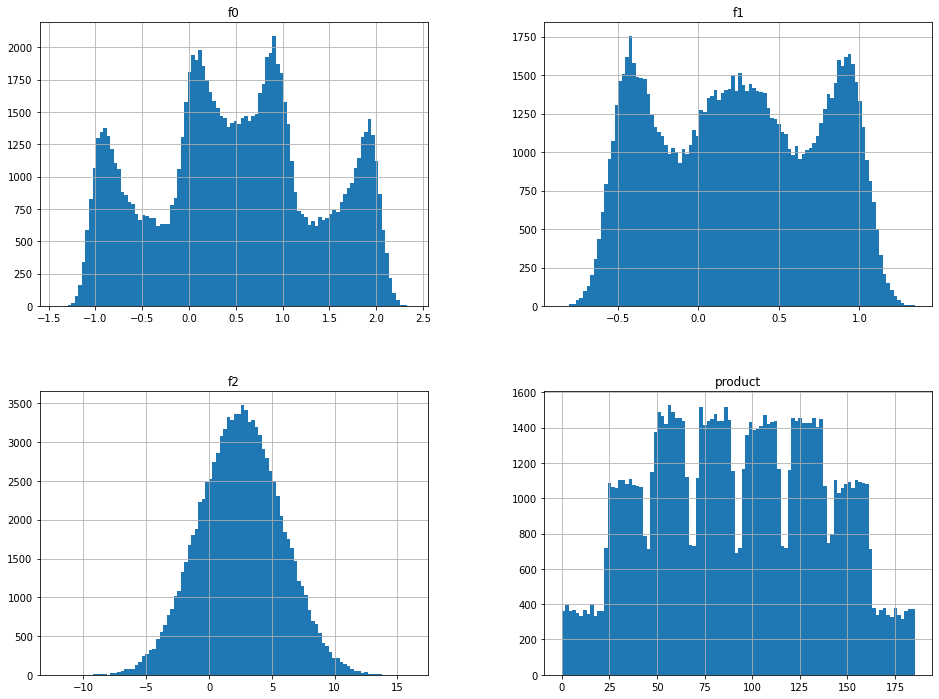

In [5]:
print('Распределения данных в df0')
ax0 = df0.hist(bins = 100, figsize = (16,12))
None

Распределения данных в df1


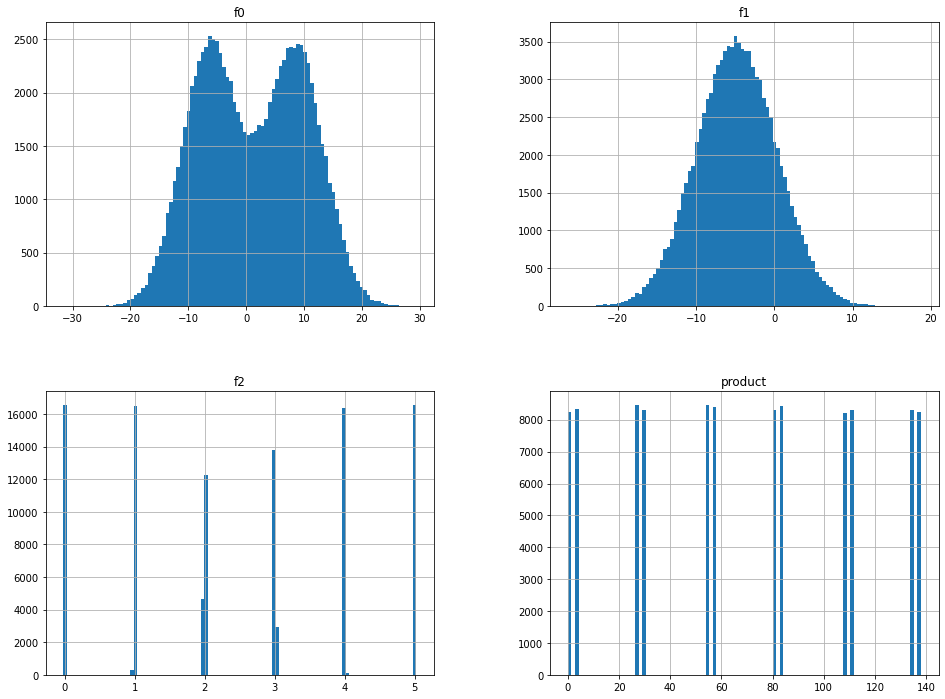

In [6]:
print('Распределения данных в df1')
ax1 = df1.hist(bins = 100, figsize = (16,12))
None

Распределения данных в df2


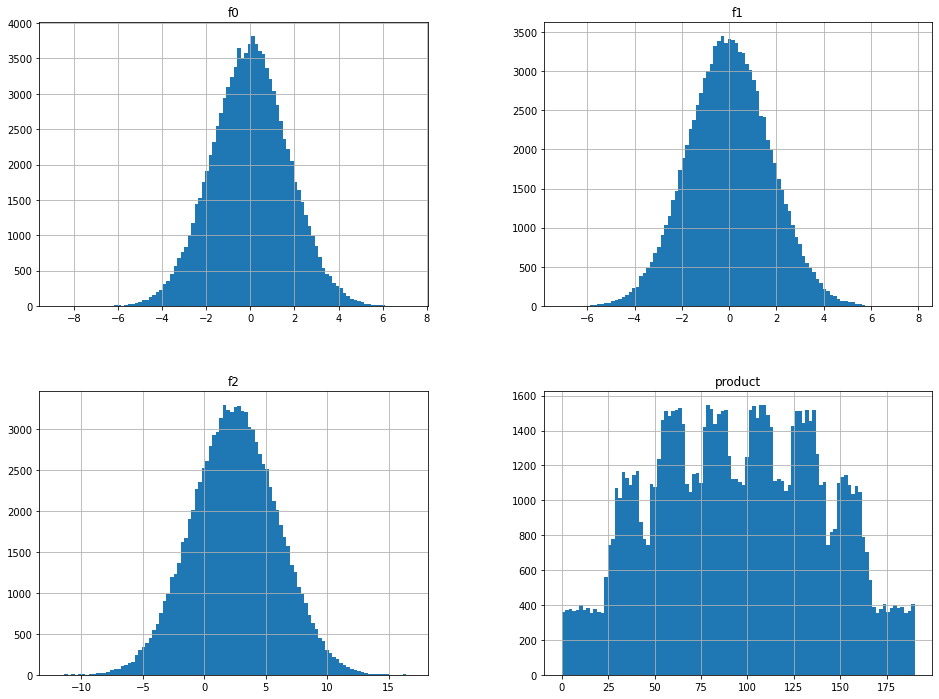

In [7]:
print('Распределения данных в df2')
ax2 = df2.hist(bins = 100, figsize = (16,12))
None

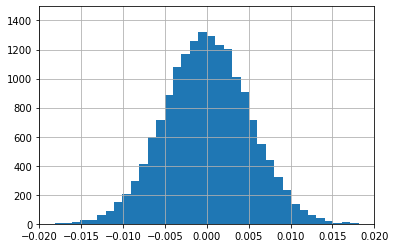

In [8]:
df1['f2'].hist(bins = 5000)
plt.xlim([-0.02, 0.02])
plt.show()

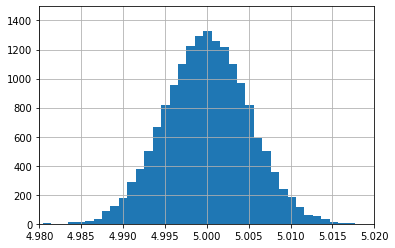

In [9]:
df1['f2'].hist(bins = 5000)
plt.xlim([4.98, 5.02])
plt.show()

<b> Как видим "пиковые" значения на гистограммах на самом деле являются гаусовыми распределениями </b>

In [10]:
df1['product'].value_counts(ascending = True) 

107.8130441    8201
137.9454077    8233
0.0000000      8235
110.9921467    8303
134.7663052    8304
30.1323636     8306
80.8597831     8320
3.1791026      8337
57.0856246     8390
84.0388857     8431
26.9532610     8468
53.9065221     8472
Name: product, dtype: int64

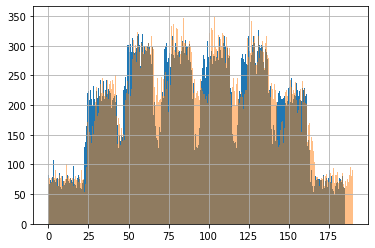

In [11]:
df0['product'].hist(bins = 500, alpha = 1)
df2['product'].hist(bins = 500, alpha = 0.5)
None

Нормальным распределением обладают не все данные. 

Нормальное распределение признаков:
    
    /datasets/geo_data_0.csv - f2
        
    /datasets/geo_data_1.csv - f1

    /datasets/geo_data_2.csv - f0, f1, f2

Остальные распределения имеют насколько наложенных нормальных распределений с различными расстояниями между вершинами.    
    
Объём запасов в скважине не обладает нормальностью в распределении.
    
В /datasets/geo_data_1.csv - всего двенадцать уникальных значений по объему запасов и шесть раздельно стоящих нормальных распределений признака f2 вокруг целых чисел от 0 до 5. Уникальные значения запасов можно собрать в пары 
    
    for i in range (0, 6):
        V1 = i * 26.953261
        V2 = i * 26.953261 +  3.179103
        


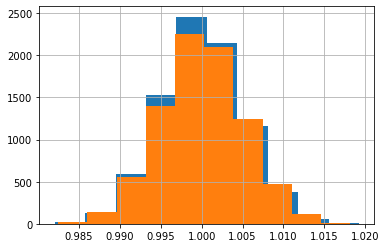

In [12]:
df1.query('26 < product < 27')['f2'].hist()
df1.query('29 < product < 32')['f2'].hist()
None

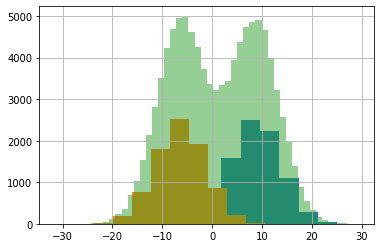

In [13]:
df1.query('26 < product < 27')['f0'].hist()
df1.query('29 < product < 32')['f0'].hist()
df1['f0'].hist(alpha = 0.5, bins = 50)
None

In [14]:
print(df0.duplicated().sum())
print(df1.duplicated().sum())
print(df2.duplicated().sum())

0
0
0


### Подытог

    В датасетах синтетические наборы обработки не требуют.

## Обучение и проверка модели

- Начнем подготовку данных для использования в моделях;
- Удалим уникальные идентификаторы.

In [15]:
rnd = 12345

target0 = df0['product']
features0 = df0.drop(['id', 'product'], axis=1)
target1 = df1['product']
features1 = df1.drop(['id', 'product'], axis=1)
target2 = df2['product']
features2 = df2.drop(['id', 'product'], axis=1)

features_train0, features_valid0, target_train0, target_valid0 = train_test_split(
    features0, target0, test_size=0.25, random_state=rnd)

features_train1, features_valid1, target_train1, target_valid1 = train_test_split(
    features1, target1, test_size=0.25, random_state=rnd)

features_train2, features_valid2, target_train2, target_valid2 = train_test_split(
    features2, target2, test_size=0.25, random_state=rnd)

- Обучим модель и сделаем предсказания на валидационной выборке;
- Сохраним предсказания и правильные ответы на валидационной выборке;
- Напечатаем на экране средний запас предсказанного сырья и RMSE модели;
- Проанализируем результаты.

In [16]:
#Первый регион
model0 = LinearRegression() 

model0.fit(features_train0,target_train0) 

predictions_valid0 = model0.predict(features_valid0) 

df0_model_product_mean = predictions_valid0.mean() #средний запас предсказанного сырья

RMSE0 = mean_squared_error(target_valid0,predictions_valid0)**0.5 #RMSE модели

print("Cредний запас предсказанного сырья df0", round(df0_model_product_mean, 3)) 
print("RMSE модели df0:", round(RMSE0, 3))
print("Cредний запас сырья, факт df0", round(target_valid0.mean(), 3))

Cредний запас предсказанного сырья df0 92.593
RMSE модели df0: 37.579
Cредний запас сырья, факт df0 92.079


In [17]:
#Второй регион
model1 = LinearRegression() 
model1.fit(features_train1,target_train1) 

predictions_valid1 = model1.predict(features_valid1)

df1_model_product_mean = predictions_valid1.mean() #средний запас предсказанного сырья

RMSE1 = mean_squared_error(target_valid1,predictions_valid1)**0.5 #RMSE модели

print("Cредний запас предсказанного сырья df1", round(df1_model_product_mean, 3)) 
print("RMSE модели df1:", round(RMSE1, 3))
print("Cредний запас сырья, факт df1", round(target_valid1.mean(), 3))

Cредний запас предсказанного сырья df1 68.729
RMSE модели df1: 0.893
Cредний запас сырья, факт df1 68.723


In [18]:
#Третий регион
model2 = LinearRegression()

model2.fit(features_train2,target_train2)
predictions_valid2 = model2.predict(features_valid2)
df2_model_product_mean = predictions_valid2.mean() #средний запас предсказанного сырья

RMSE2 = mean_squared_error(target_valid2,predictions_valid2)**0.5 #RMSE модели

print("Cредний запас предсказанного сырья df2", round(df2_model_product_mean, 3)) 
print("RMSE модели df2:", round(RMSE2, 3))
print("Cредний запас сырья, факт df2", round(target_valid2.mean(), 3))

Cредний запас предсказанного сырья df2 94.965
RMSE модели df2: 40.03
Cредний запас сырья, факт df2 94.884


- RMSE модели df1: 0.893 крайне низкое, ведь линейная регрессия отлично работает на линейно сгенерированных данных.

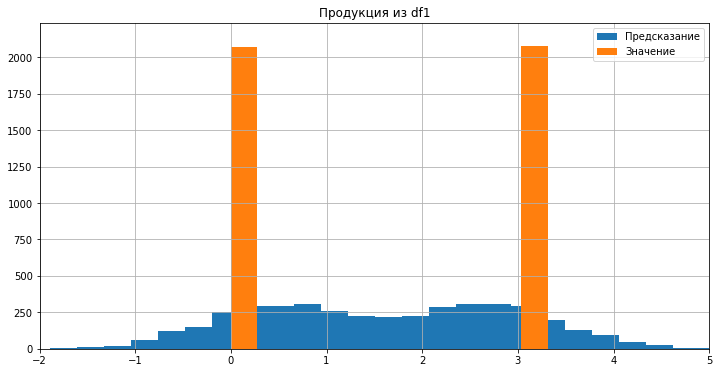

In [19]:
series_predictions_valid1 = pd.Series(predictions_valid1)

series_predictions_valid1.hist(bins = 500)
target_valid1.hist(bins = 500, figsize=(12, 6))
plt.xlim([-2, 5])
plt.title('Продукция из df1')
plt.legend(['Предсказание', 'Значение'])
plt.show()

- Видим, что предсказания нормально распределены вокруг правильных значений.



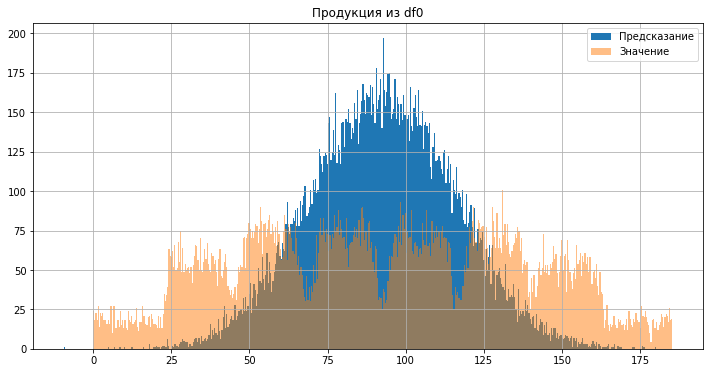

In [20]:
series_predictions_valid0 = pd.Series(predictions_valid0)
series_predictions_valid0.hist(bins = 500)
target_valid0.hist(bins = 500, alpha = 0.5, figsize=(12, 6))
plt.title('Продукция из df0')
plt.legend(['Предсказание', 'Значение'])
plt.show()

### Подытог  
По результатам построения моделей, средний запас сырья на месторождениях по скважинам практически идентичен между моделью и фактом.
    
    RMSE модели df0: 37.5794217150813
    RMSE модели df1: 0.893099286775617
    RMSE модели df2: 40.02970873393434

Учитывая, что в скважинах запасы варьируются в пределах от нуля до 180 - это приемлимый результат.

Так же первое и третье месторождение близки по запасам, а второе - хуже их обоих. Но на нем самое низкое RMSE. 
    
    Cредний запас сырья, факт df0 92 тыс. барелей
    
    Cредний запас сырья, факт df1 69 тыс. барелей
    
    Cредний запас сырья, факт df2 94 тыс. барелей

    
</div>

## Подготовка к расчёту прибыли

Подготовимся к расчёту прибыли:
- Все ключевые значения для расчётов сохраним в отдельных переменных;
- Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе;
- Напишите выводы по этапу подготовки расчёта прибыли.

<b>   Условия:</b>
    
    При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
    
    Бюджет на разработку скважин в регионе — 10 млрд рублей.
    
    При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
    
    После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.
    


In [21]:
wells_candidates = 500 #На рассмотрении под бурение будет предоставлено 500 кандидатов
wells_target = 200 #Выбрано будет 200 объектов для бурения
development_budget = 10000000000 #Бюджет, необходимый для бурения этих скважин
barrel_income = 450 #Доход с бареля (этот показатель нам не нужен)
product_income = 450000 #Доход с единицы продукции из колонки product

In [22]:
zero_profit_production = development_budget/(wells_target*product_income)
print('Необходимый объем нефти со скважины для региона :',round(zero_profit_production,3))

Необходимый объем нефти со скважины для региона : 111.111


In [23]:
print('Средние запасы на скважину в первом регионе:', round(df0['product'].mean(),3), 
      'что на', round(zero_profit_production - df0['product'].mean(),3), 'меньше необходимого на скважину')

Средние запасы на скважину в первом регионе: 92.5 что на 18.611 меньше необходимого на скважину


In [24]:
print('Средние запасы на скважину в первом регионе:', round(df1['product'].mean(),3), 
      'что на', round(zero_profit_production - df1['product'].mean(),3), 'меньше необходимого на скважину')

Средние запасы на скважину в первом регионе: 68.825 что на 42.286 меньше необходимого на скважину


In [25]:
print('Средние запасы на скважину в первом регионе:', round(df2['product'].mean(),3), 
      'что на', round(zero_profit_production - df2['product'].mean(),3), 'меньше необходимого на скважину')

Средние запасы на скважину в первом регионе: 95.0 что на 16.111 меньше необходимого на скважину


### Подытог   

    На первый взгляд самым перспективным кажутся первый и третий регионы. В среднем необходимо 111.1 тысяч барелей извлекаемых запасов с каждой скважины, которых мы планируем пробурить всего 200 шутк. В каждом из регионов средние запасы на скважину меньше, однако выборка потенциальных точек расположения скважин - 10 000, поэтому велик шанс найти прибыльные скважины. Второй регион, несмотря на низкие средние запасы, тем не менее обладает более чем по 8000 скважин с запасами 134 и 138 тысяч тонн. 
    
<b>Необходимо рассчитать прибыль и риски.</b>
    

## Расчёт прибыли и рисков 

### Функция расчета прибыли

Создадим функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

- Функция будет отбирать 200 скважин из 500 с максимальным предсказанным дебитом и возвращать прибыль от этого решения, рассчитанную по фактическим дебитам из таблицы.

In [29]:
def profit_from_best_wells(target, prediction, wells):
    best_wells_index = pd.Series(prediction).sort_values(ascending=False)[:wells].index #индексы 200 лучших скважин из выборки
    best_well_actual_oil = target.iloc[best_wells_index][:wells] #список фактической добычи этих скважин
    profit = best_well_actual_oil.sum()*product_income - development_budget #Прибыль от этих скважин
    return profit

- Протестируем функцию на валидационных выборках наших дата сетов.

In [53]:
print('Финансовый результат выбранных алгоритмом 200 скважин из валидационной выборки df0:',
      f'{profit_from_best_wells(target_valid0, predictions_valid0, 200)/10**6:.2}', "млн.")
print('Финансовый результат выбранных алгоритмом 200 скважин из валидационной выборки df1:',
      f'{profit_from_best_wells(target_valid1, predictions_valid1, 200)/10**6:.2}', "млн.")
print('Финансовый результат выбранных алгоритмом 200 скважин из валидационной выборки df2:',
      f'{profit_from_best_wells(target_valid2, predictions_valid2, 200)/10**6:.2}', "млн.")


Финансовый результат выбранных алгоритмом 200 скважин из валидационной выборки df0: 3.3e+03 млн.
Финансовый результат выбранных алгоритмом 200 скважин из валидационной выборки df1: 2.4e+03 млн.
Финансовый результат выбранных алгоритмом 200 скважин из валидационной выборки df2: 2.7e+03 млн.


- Взглянем на те дебиты, которые ожидал наш алгоритм

In [54]:
print('Финансовые ожидания от выбранных алгоритмом 200 скважин из валидационной выборки df0:',
      f'{profit_from_best_wells(series_predictions_valid0, predictions_valid0, 200)/10**6:.2}', "млн.")
print('Финансовые ожидания от выбранных алгоритмом 200 скважин из валидационной выборки df1:',
      f'{profit_from_best_wells(series_predictions_valid1, predictions_valid1, 200)/10**6:.2}', "млн.")
print('Финансовые ожидания от выбранных алгоритмом 200 скважин из валидационной выборки df2:',
      f'{profit_from_best_wells(pd.Series(predictions_valid2), predictions_valid2, 200)/10**6:.2}', "млн.")


Финансовые ожидания от выбранных алгоритмом 200 скважин из валидационной выборки df0: 4e+03 млн.
Финансовые ожидания от выбранных алгоритмом 200 скважин из валидационной выборки df1: 2.5e+03 млн.
Финансовые ожидания от выбранных алгоритмом 200 скважин из валидационной выборки df2: 3.3e+03 млн.


- В целом неплохо получилось

### Расчет риска и прибыли для каждого региона

Задание от заказчика:
    
- Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
    
- Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
    
- Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

In [56]:
def risk_calculus(target0, features0, model0):
    state = np.random.RandomState(rnd) 
    values = []
    negative_score = 0
    for i in range(1000):
        target_subsample = target0.sample(n = 500, replace = True, random_state = state) #берем выборку 500 штук из полного набора
        features_subsample = features0.iloc[target_subsample.index] #берем признаки этой выборки
        probs_subsample = model0.predict(features_subsample) #предсказываем по модели их накопленные запасы (модель уже обучена)
        res = profit_from_best_wells(target_subsample, probs_subsample, 200) #функцией считаем фактическую прибыль
        if res < 0:
            negative_score +=1 
        values.append(res)

    values = pd.Series(values) 
    lower = values.quantile(0.025) #нижний квантиль для 95% интервала
    higher = values.quantile(0.975) #верхний квантиль для 95% интервала

    mean = values.mean() #среднюю прибыль по выборкам
    print("Средняя прибыль:", round(mean/1000000), 'млн. рублей') #для удобства переводим всё в миллионы
    print("Доверительный интервал прибыли:", round(lower/1000000), ' - ',  round(higher/1000000), 'млн. рублей')
    print('Риск убытков при разработке региона:', round(negative_score/len(values)*100, 1), '%') 
    values.hist(bins = 50) #для наглядности, чтоб себя проверить
    #сразу проверяем, подходит ли по одному из обозначенных критериев
    if lower>0:
        print('Вероятность убытков меньше 2.5%, регион подходит для разработки')
    else:
        print('Вероятность убытков больше 2.5%, регион не подходит для разработки')
    plt.xlabel('Прибыль, млрд. руб.')
    plt.ylabel('Количество кейсов')
    plt.title('Распределение вероятностей получения прибыли')
    plt.show() 

Регион DF0: 

Средняя прибыль: 424 млн. рублей
Доверительный интервал прибыли: -78  -  969 млн. рублей
Риск убытков при разработке региона: 5.2 %
Вероятность убытков больше 2.5%, регион не подходит для разработки


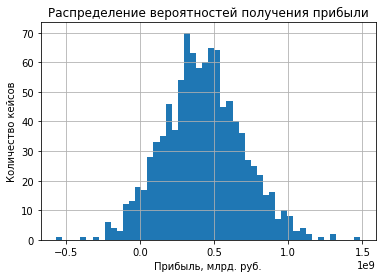




Регион DF1: 

Средняя прибыль: 449 млн. рублей
Доверительный интервал прибыли: 37  -  824 млн. рублей
Риск убытков при разработке региона: 1.4 %
Вероятность убытков меньше 2.5%, регион подходит для разработки


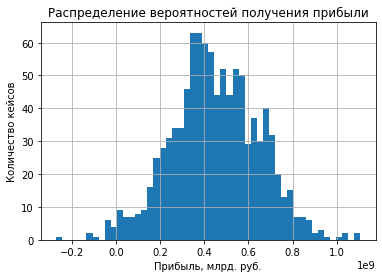




Регион DF2: 

Средняя прибыль: 374 млн. рублей
Доверительный интервал прибыли: -182  -  896 млн. рублей
Риск убытков при разработке региона: 9.2 %
Вероятность убытков больше 2.5%, регион не подходит для разработки


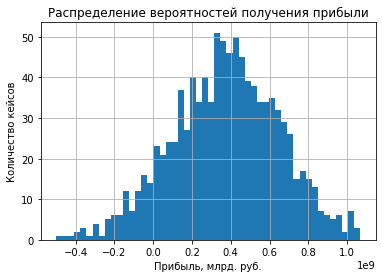

In [60]:
print('Регион DF0: \n')
risk_calculus(target0, features0, model0)
print('\n\n\nРегион DF1: \n')
risk_calculus(target1, features1, model1)
print('\n\n\nРегион DF2: \n')
risk_calculus(target2, features2, model2)

## Общий вывод

    Полученные результаты показывают, что в первом и третьем регионе вероятность получения убытков превышает пороговое значение в 2.5%. Это связано прежде всего с невысоким качеством модели. Средний потенциал обоих регионов выше, чем у второго, однако низкое качество модели не позволяет правильно отобрать геологические цели.
   
   
   
    
<b>                 Второй регион показывает низкую вероятность получения убытков - 1.4%, среднюю прибыль в 449 млн. рублей с доверительным интервалом от 37 до 824 млн. рублей. Качество модели, несмотря на хорошие показатели RMSE все ещё может быть улучшено для увеличения долгострочной прибыли. </b>